In [1]:
import requests
import gensim
from gensim import corpora
from bs4 import BeautifulSoup
import string
import re
import nltk

from nltk import WordNetLemmatizer

search_query = input("Enter a search query: ")
url = f"https://www.google.com/search?q={search_query}&num=10"

response = requests.get(url)
text = response.text

soup = BeautifulSoup(text, 'html.parser')
documents = [soup.get_text()]

#Remove punctuation
documents = [''.join([word for word in document if word not in string.punctuation]) for document in documents]

#Remove numbers
documents = [re.sub(r'\d+', '', document) for document in documents]

#Tokenize and remove stop words
stop_words = set(gensim.parsing.preprocessing.STOPWORDS)
texts = [[word for word in document.lower().split() if word not in stop_words] for document in documents]

#Lemmatize words
lemmatizer = WordNetLemmatizer()
texts = [[lemmatizer.lemmatize(word) for word in document] for document in texts]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=20)

topics = lda_model.print_topics(num_words=10)

for topic in topics:
    print(topic)

(0, '0.007*"erickson" + 0.007*"›" + 0.007*"professor" + 0.007*"august" + 0.007*"engineering" + 0.007*"jeff" + 0.007*"science" + 0.007*"grainger" + 0.007*"algorithm" + 0.007*"google"')
(1, '0.007*"erickson" + 0.007*"›" + 0.007*"professor" + 0.007*"august" + 0.007*"google" + 0.007*"jeff" + 0.007*"science" + 0.007*"engineering" + 0.007*"c" + 0.007*"university"')
(2, '0.007*"erickson" + 0.007*"›" + 0.007*"august" + 0.007*"professor" + 0.007*"engineering" + 0.007*"jeff" + 0.007*"science" + 0.007*"urbanachampaign" + 0.007*"illinois" + 0.007*"department"')
(3, '0.007*"erickson" + 0.007*"professor" + 0.007*"›" + 0.007*"august" + 0.007*"jeff" + 0.007*"engineering" + 0.007*"google" + 0.007*"science" + 0.007*"grainger" + 0.007*"department"')
(4, '0.080*"erickson" + 0.045*"›" + 0.027*"professor" + 0.023*"august" + 0.019*"jeff" + 0.014*"google" + 0.014*"science" + 0.014*"engineering" + 0.010*"–" + 0.010*"college"')


[nltk_data] Downloading package omw-1.4 to /Users/jasonz/nltk_data...


True

In [1]:
import torch
from transformers import PegasusTokenizer, PegasusForConditionalGeneration

# initialize tokenizer and model
tokenizer = PegasusTokenizer.from_pretrained('google/pegasus-large')
model = PegasusForConditionalGeneration.from_pretrained('google/pegasus-large')

# define input text
input_text = """My favorite food is pizza. I love the combination of cheese and tomato sauce. 
                 I also enjoy adding toppings like mushrooms, onions, and peppers."""

# tokenize input text
input_ids = tokenizer.encode(input_text, return_tensors='pt')

# generate summary
summary_ids = model.generate(input_ids, num_beams=4, max_length=150, early_stopping=True)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print("Summary:")
print(summary)


Summary:
I also enjoy adding toppings like mushrooms, onions, and peppers.


In [2]:
import requests
from transformers import PegasusTokenizer, PegasusForConditionalGeneration
from bs4 import BeautifulSoup

# Get user input
search_query = input("Enter a search query: ")

# Construct URL
url = f"https://www.google.com/search?q={search_query}&num=10"

# Send GET request and extract HTML content
response = requests.get(url)
html_content = response.text

# Extract text from HTML using Beautiful Soup
soup = BeautifulSoup(html_content, 'html.parser')
text = ' '.join(soup.stripped_strings)

# Initialize tokenizer and model
tokenizer = PegasusTokenizer.from_pretrained('google/pegasus-xsum')
model = PegasusForConditionalGeneration.from_pretrained('google/pegasus-xsum')

# Tokenize input and generate summary
input_ids = tokenizer.encode(text, return_tensors='pt', max_length=1024, truncation=True)
summary_ids = model.generate(input_ids, max_length=150, num_beams=4, early_stopping=True)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print("Summary:")
print(summary)



Summary:
Jeff Erickson is a professor of computer science at the University of Illinois at Urbana-Champaign.


In [28]:
import requests
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

# Download NLTK resources
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')

# Define search query and construct URL
search_query = "Jeff Erickson Professor Education Research Interests"
url = f"https://www.google.com/search?q={search_query}&num=10"

# Send GET request and extract HTML content
response = requests.get(url)
html_content = response.text

# Extract text from HTML using Beautiful Soup
soup = BeautifulSoup(html_content, 'html.parser')
text = ' '.join(soup.stripped_strings)

# Tokenize text and remove stop words
tokens = word_tokenize(text.lower())
stop_words = set(stopwords.words('english'))
tokens = [t for t in tokens if t not in stop_words]

# Lemmatize tokens
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(t) for t in tokens]

# Tag tokens with part-of-speech (POS)
tagged_tokens = pos_tag(tokens)

# Extract keywords related to education, research interests, and other things
education_keywords = [t[0] for t in tagged_tokens if t[1] == 'NN' and 'education' in t[0].lower()]
research_keywords = [t[0] for t in tagged_tokens if t[1] == 'NN' and 'research' in t[0].lower()]
other_keywords = [t[0] for t in tagged_tokens if t[1] == 'NN' and t[0] not in education_keywords and t[0] not in research_keywords]

# Print results
print("Education keywords:", education_keywords)
print("Research keywords:", research_keywords)
print("Other keywords:", other_keywords)


Education keywords: ['education', 'education', 'education']
Research keywords: ['research', 'research', 'research', 'research', 'research', 'research', 'research', 'research', 'research', 'www.researchgate.net']
Other keywords: ['jeff', 'erickson', 'professor', 'interest', 'google', 'search', 'g', 'g', 'l', 'e', 'please', 'click', 'news', 'image', 'video', 'map', 'book', 'search', 'tool', 'time', 'time', 'hour', 'hour', 'week', 'month', 'year', 'result', 'result', 'verbatim', 'interest', 'algorithm', 'data', 'structure', 'bound', 'geometry', 'topology', 'jeff', 'erickson', 'grainger', 'college', 'engineering', 'grainger.illinois.edu', 'directory', 'faculty', 'jeffe', 'jeff', 'erickson', 'jeffe.cs.illinois.edu', 'geometer/topologist/graphophile', 'interest', 'algorithm', 'data', 'structure', 'bound', 'family', 'award', 'erickson', 'jeffe.cs.illinois.edu', 'interest', 'geometry', 'topology', 'graph', 'algorithm', 'computer', 'science', 'cv', 'pdf', 'jeff', 'university', 'jeffe.cs.illinoi

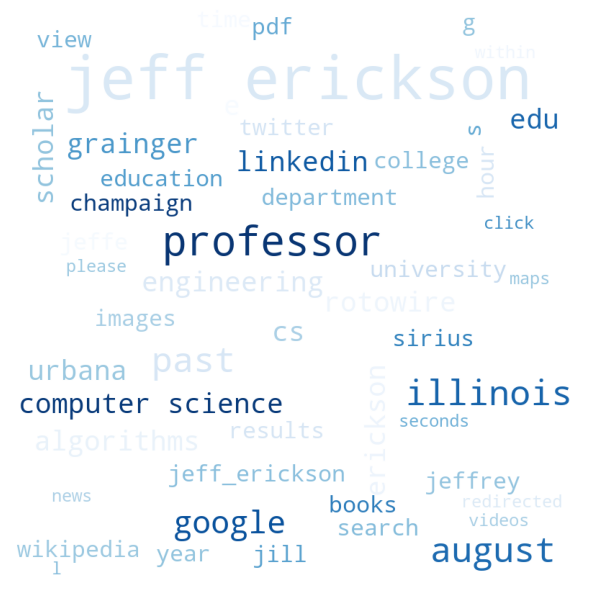

In [32]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Get user input
search_query = input("Enter a professor name: ")

# Construct URL
url = f"https://www.google.com/search?q={search_query}&num=10"

# Send GET request and extract HTML content
response = requests.get(url)
html_content = response.text

# Extract text from HTML using Beautiful Soup
soup = BeautifulSoup(html_content, 'html.parser')
text = ' '.join(soup.stripped_strings)

# Tokenize the text
tokens = nltk.word_tokenize(text)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words]

# Create word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50, colormap='Blues').generate(' '.join(filtered_tokens))

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
  
plt.show()


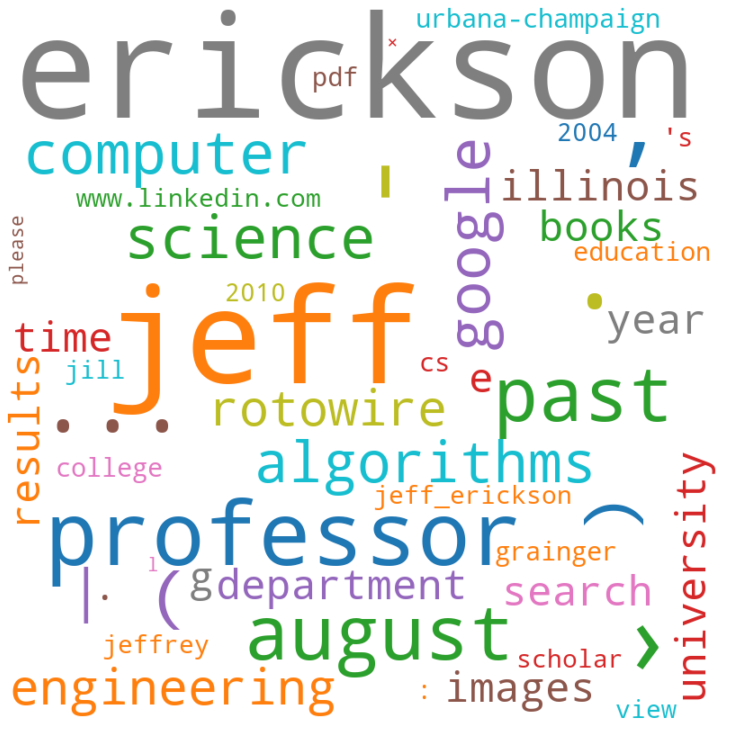

In [34]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Get user input
search_query = input("Enter a professor name: ")

# Construct URL
url = f"https://www.google.com/search?q={search_query}&num=10"

# Send GET request and extract HTML content
response = requests.get(url)
html_content = response.text

# Extract text from HTML using Beautiful Soup
soup = BeautifulSoup(html_content, 'html.parser')
text = ' '.join(soup.stripped_strings)

# Tokenize the text
tokens = nltk.word_tokenize(text)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words]

# Get word frequencies
freq_dist = nltk.FreqDist(filtered_tokens)
word_freq = {word: freq_dist[word] for word in freq_dist.keys()}

# Create word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='tab10', max_words=50)
wordcloud.generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


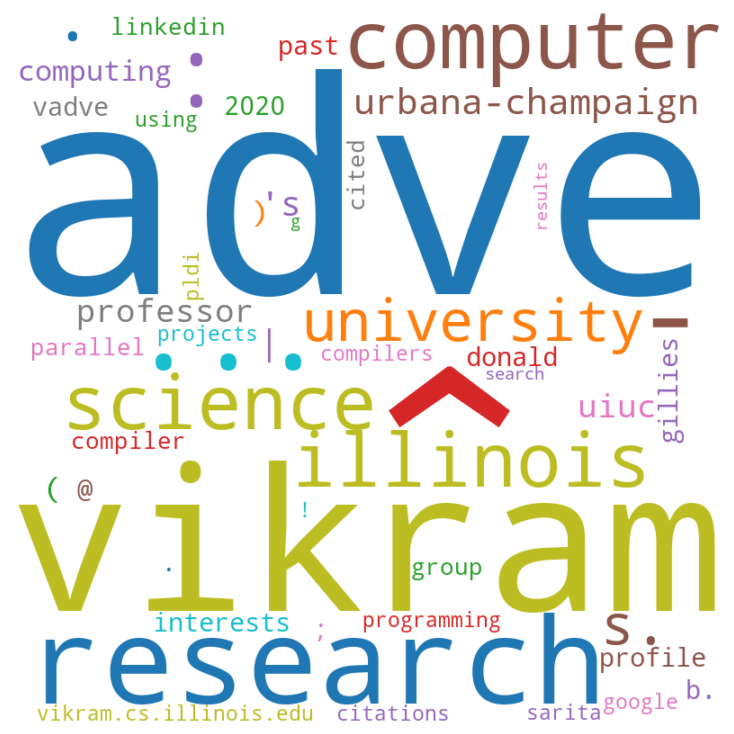

In [41]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Get user input
search_query = input("Enter a professor name: ")

# Construct Google search URL
google_url = f"https://www.google.com/search?q={search_query}&num=25"

# Send GET request and extract HTML content
google_response = requests.get(google_url)
google_soup = BeautifulSoup(google_response.text, 'html.parser')

# Extract text from Google search using Beautiful Soup
google_text = ' '.join(google_soup.stripped_strings)

# Tokenize the Google search text
google_tokens = nltk.word_tokenize(google_text)

# Remove stop words from Google search text
stop_words = set(stopwords.words('english'))
google_filtered_tokens = [word.lower() for word in google_tokens if word.lower() not in stop_words]

# Get word frequencies from Google search
google_freq_dist = nltk.FreqDist(google_filtered_tokens)
google_word_freq = {word: google_freq_dist[word] for word in google_freq_dist.keys()}

# Construct Quora search URL
quora_url = f"https://www.quora.com/search?q={search_query}"

# Send GET request and extract HTML content
quora_response = requests.get(quora_url)
quora_soup = BeautifulSoup(quora_response.text, 'html.parser')

# Extract text from Quora search using Beautiful Soup
quora_text = ' '.join(quora_soup.stripped_strings)

# Tokenize the Quora search text
quora_tokens = nltk.word_tokenize(quora_text)

# Remove stop words from Quora search text
quora_filtered_tokens = [word.lower() for word in quora_tokens if word.lower() not in stop_words]

# Get word frequencies from Quora search
quora_freq_dist = nltk.FreqDist(quora_filtered_tokens)
quora_word_freq = {word: quora_freq_dist[word] for word in quora_freq_dist.keys()}

# Merge word frequencies from Google and Quora searches
merged_word_freq = google_word_freq.copy()
merged_word_freq.update(quora_word_freq)

# Create word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='tab10', max_words=50)
wordcloud.generate_from_frequencies(merged_word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


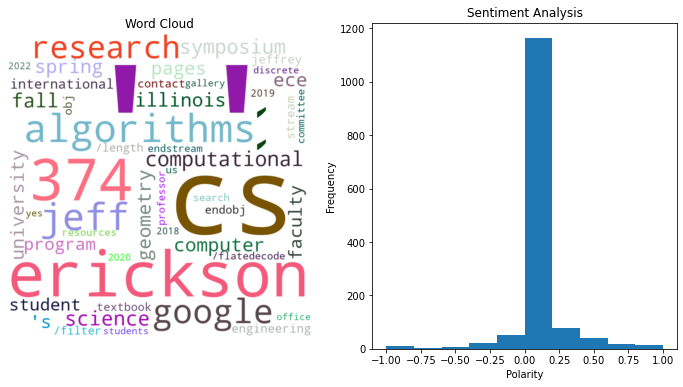

In [63]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import random

# Define a custom color function
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(360.0 * random.random())
    s = int(100.0 * random.random())
    l = int(70.0 * random.random() + 15.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

# Get user input
search_query = input("Enter a professor name: ")

# Construct URL for Google search
google_url = f"https://www.google.com/search?q={search_query}&num=25"
google_response = requests.get(google_url)
google_soup = BeautifulSoup(google_response.text, 'html.parser')

# Extract URLs from Google search
urls = []
for link in google_soup.find_all('a'):
    href = link.get('href')
    if href.startswith('/url?q='):
        url = href[7:href.find('&')]
        urls.append(url)

# Scrape text from each URL and concatenate into one string
text = ''
for url in urls:
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        text += ' '.join(soup.stripped_strings)
    except:
        pass

# Remove non-ASCII characters
text = text.encode("ascii", "ignore").decode()

# Tokenize the text
tokens = nltk.word_tokenize(text)

# Remove stop words and one-letter words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if (word.lower() not in stop_words) and (len(word) > 1)]

# Get word frequencies
freq_dist = nltk.FreqDist(filtered_tokens)
word_freq = {word: freq_dist[word] for word in freq_dist.keys()}

# Perform sentiment analysis on each sentence
sentences = nltk.sent_tokenize(text)
polarity_scores = []
for sentence in sentences:
    blob = TextBlob(sentence)
    polarity_scores.append(blob.sentiment.polarity)

# Create word cloud with custom color function
wordcloud = WordCloud(width=800, height=800, background_color='white', color_func=random_color_func, max_words=50)
wordcloud.generate_from_frequencies(word_freq)

# Plot the word cloud and sentiment analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.imshow(wordcloud, interpolation='bilinear')
ax1.set_title('Word Cloud')
ax1.axis("off")

ax2.hist(polarity_scores, bins=10)
ax2.set_title('Sentiment Analysis')
ax2.set_xlabel('Polarity')
ax2.set_ylabel('Frequency')

plt.show()


In [33]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

# Define the TextRank algorithm
def textrank(document, n=10):
    # Tokenize the document into sentences and words
    sentences = sent_tokenize(document)
    words = word_tokenize(document)
    
    # Remove stop words and punctuation
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and word.isalnum()]
    
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Calculate word frequency
    word_freq = nltk.FreqDist(words)
    
    # Calculate word co-occurrence
    co_occurrence = nltk.defaultdict(lambda: nltk.defaultdict(int))
    for i in range(len(sentences)):
        sentence = sentences[i]
        sentence_words = word_tokenize(sentence)
        sentence_words = [word for word in sentence_words if word not in stop_words and word.isalnum()]
        for j in range(len(sentence_words)):
            for k in range(j+1, len(sentence_words)):
                w1, w2 = sorted([sentence_words[j], sentence_words[k]])
                if w1 != w2:
                    co_occurrence[w1][w2] += 1
                    
    # Calculate TextRank score for each word
    d = 0.85  # damping factor
    scores = nltk.defaultdict(float)
    for i in range(10):
        for word in words:
            score = 1 - d
            for neighbor in co_occurrence[word]:
                score += d * co_occurrence[word][neighbor] / (word_freq[neighbor] + 1) # add 1 to prevent div by 0
            score += (1-d) # needed to prevent div by 0
            scores[word] = score
            
    # Sort words by score and return top n
    top_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:n]
    return [word for word, score in top_words]


# Get user input
search_query = input("Enter a professor name: ")

# Construct URL for Google search
google_url = f"https://www.google.com/search?q={search_query}&num=25"
google_response = requests.get(google_url)
google_soup = BeautifulSoup(google_response.text, 'html.parser')

# Add extra later of processing to try and get only text
#google_text = google_soup.get_text()
# seems to give even worse results

# Extract URLs from Google search
urls = []
for link in google_soup.find_all('a'):
    href = link.get('href')
    if href.startswith('/url?q='):
        url = href[7:href.find('&')]
        urls.append(url)

# Scrape text from each URL and concatenate into one string
text = ''
for url in urls:
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        text += ' '.join(soup.stripped_strings)
    except:
        pass

# Remove non-ASCII characters
text = text.encode("ascii", "ignore").decode()


#text = "Jeff Erickson is a UIUC professor."
keywords = textrank(text, n=10)
print(keywords)

['374', 'All', 'CS', 'Google', 'Art', '9', 'Erickson', 'Engineering', 'Algorithms', '0']


In [34]:
def write_to_file(text, filename):
    with open(filename, 'w') as f:
        f.write(text)
filename = "textrank.txt"
write_to_file(text, filename) # to see what text looks like before going into model